<a href="https://www.kaggle.com/code/kaushiksuresh147/ethereum-eda-and-prediction-using-prophet?scriptVersionId=94914837" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div>
    <h1><center style="background-color:#98FB98; color:white;"> Ethereum Historical Data Analysis</center></h1>
</div>


<div>
<img src="https://altramp.com/wp-content/uploads/2020/06/Ethereum-3.gif" width='500'>
</div>

<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background-color:#98FB98; border:0' role="tab" aria-controls="home" color=black><center>Quick navigation</center></h3>

* [1. Required Libraries](#1)
* [2. Dataset Quick Overview](#2)
* [3. Distribution of Features](#3)
* [4. Correlation Analysis ](#4)   
* [5. Candle stick chart on Ethereum historical data](#5)
* [6. Time series analysis and prediction using prophet](#6)
* [7. References & Dataset](#7)

    Kindly, Upvote the notebook!

<div class="alert alert-info">
<p><center>Ethereum a decentralized, open-source blockchain featuring smart contract functionality was proposed in 2013 by programmer Vitalik Buterin. Development was crowdfunded in 2014, and the network went live on 30 July 2015, with 72 million coins premined.<center><p>

<p>Some interesting facts about Ethereum(ETH):</p>

<p>1.Ether (ETH) is the native cryptocurrency of the platform. It is the second-largest cryptocurrency by market capitalization, after Bitcoin. Ethereum is the most actively used blockchain.</p>
<p>2. Some of the world’s leading corporations joined the EEA(Ethereum Alliance, is a collaboration of many block start-ups) and supported “further development.” Some of the most famous companies are Samsung SDS, Toyota Research Institute, Banco Santander, Microsoft, J.P.Morgan, Merck GaA, Intel, Deloitte, DTCC, ING, Accenture, Consensys, Bank of Canada, and BNY Mellon.</p>
</div>

<a id="1"></a>
<h2 style='background-color:#98FB98; border:0; color:black'><center>Required Libraries</center><h2>

In [1]:

#Data Pre-Processing packages:
import numpy as np 
import pandas as pd 
from datetime import datetime


#Data Visualization Packages:
#Seaborn
import seaborn as sns
sns.set(rc={'figure.figsize':(10,6)})
custom_colors = ["#4e89ae", "#c56183","#ed6663","#ffa372"]

#Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

#Colorama
from colorama import Fore, Back, Style # For text colors
y_= Fore.CYAN
m_= Fore.WHITE

#NetworkX
import networkx as nx
import plotly.graph_objects as go #To construct network graphs

#To avoid printing of un necessary Deprecation warning and future warnings!
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

#Time series Analysis pacakages:

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Facebook Prophet packages:
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import add_changepoints_to_plot, plot_cross_validation_metric


#Importing of Data 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
data=pd.read_csv('../input/ethereum-cryptocurrency-historical-dataset/Ethereum Historical Data.csv')



/kaggle/input/ethereum-cryptocurrency-historical-dataset/Ethereum Historical Data.csv


<a id="2"></a>
<h2 style='background-color:#98FB98; border:0; color:black'><center>Data set Overview</center><h2>

In [2]:
print(f"{m_}Total records:{y_}{data.shape}\n")
print(f"{m_}Data types of data columns: \n{y_}{data.dtypes}")

Total records:(2244, 6)

Data types of data columns: 
Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object


In [3]:
data.head(5)

,Date,Open,High,Low,Close,Volume
0,2016-03-10,11.20,11.85,11.07,11.75,4
1,2016-03-11,11.75,11.95,11.75,11.95,179
2,2016-03-12,11.95,13.45,11.95,12.92,833
3,2016-03-13,12.92,15.07,12.92,15.07,1295
4,2016-03-14,15.07,15.07,11.40,12.50,92183


<div class="alert alert-info">
    <h3 color:black><center><b> The above dataframe show that formatting needs to be done in all the columns  the change column</b></center></h3><br>
    <p> 1. <b>Date</b> - We need to convert the date to datetime format </p>
    <p> 2. <b>Price, Open, High, and Low</b> - We need to remove the commas(,) from the values inorder to let python process the whole value</p>
    <p> 3. <b>Vol.</b> - M denotes Million, we need to convert 1.70M to 1700000</p>
    <p> 4. <b>Change %</b> - Need to remove the percentage symbol (-2.06% to -2.06)
</div>

In [4]:
# Coverting the date column to a datetime format and sorting the dataframe by date
data['Date'] =  pd.to_datetime(data['Date'],infer_datetime_format=True,format='%y-%m-%d')
data.sort_values(by='Date',inplace=True)
data.head()

,Date,Open,High,Low,Close,Volume
0,2016-03-10,11.20,11.85,11.07,11.75,4
1,2016-03-11,11.75,11.95,11.75,11.95,179
2,2016-03-12,11.95,13.45,11.95,12.92,833
3,2016-03-13,12.92,15.07,12.92,15.07,1295
4,2016-03-14,15.07,15.07,11.40,12.50,92183


In [5]:
# We should change Million(M) and Thousands(K) 
#data["Vol."] = data["Vol."].replace("-",np.nan)
#data["Vol."] = (data["Vol."].replace(r'[KM]+', '', regex=True).astype(float) * \
#              data["Vol."].str.extract(r'[\d\.]+([KM]+)', expand=False)
#                .fillna(1)
#             .replace(['K','M'], [10**3, 10**6]).astype(int))

# Our columns should not contain , because python doesn't understand it as thousand parser
data.rename(columns={'Close':'Price'},inplace=True)
#data["Price"]=data["Price"].str.extract("([0-9,]+\.?[0-9]+)").replace(',','', regex=True).astype("float")
#data["Open"]=data["Open"].str.extract("([0-9,]+\.?[0-9]+)").replace(',','', regex=True).astype("float")
#data["High"]=data["High"].str.extract("([0-9,]+\.?[0-9]+)").replace(',','', regex=True).astype("float")
#data["Low"]=data["Low"].str.extract("([0-9,]+\.?[0-9]+)").replace(',','', regex=True).astype("float")
#data["Change %"] = data["Change %"].str.extract("([-]?[0-9]+\.?[0-9]+)").astype("float")

In [6]:
data.head(5)

,Date,Open,High,Low,Price,Volume
0,2016-03-10,11.20,11.85,11.07,11.75,4
1,2016-03-11,11.75,11.95,11.75,11.95,179
2,2016-03-12,11.95,13.45,11.95,12.92,833
3,2016-03-13,12.92,15.07,12.92,15.07,1295
4,2016-03-14,15.07,15.07,11.40,12.50,92183


<div class="alert alert-info">
    <h3><b><center>Missing values</center><b></h3>
</div>


In [7]:
'''
missed = pd.DataFrame()
missed['column'] = data.columns

missed['percent'] = [round(100* data[col].isnull().sum() / len(data), 2) for col in data.columns]
missed = missed.sort_values('percent',ascending=False)
missed = missed[missed['percent']>0]

fig = sns.barplot(
    x=missed['percent'], 
    y=missed["column"], 
    orientation='horizontal',palette="winter"
).set_title('Missed values percent for every column')

'''

'\nmissed = pd.DataFrame()\nmissed[\'column\'] = data.columns\n\nmissed[\'percent\'] = [round(100* data[col].isnull().sum() / len(data), 2) for col in data.columns]\nmissed = missed.sort_values(\'percent\',ascending=False)\nmissed = missed[missed[\'percent\']>0]\n\nfig = sns.barplot(\n    x=missed[\'percent\'], \n    y=missed["column"], \n    orientation=\'horizontal\',palette="winter"\n).set_title(\'Missed values percent for every column\')\n\n'

<div class="alert alert-info">
    <h3><b>Let's drop the records with NA value, to make sure it doesnt cloud our analysis<b></h3>
</div>


In [8]:
prev_len=data.shape[0]
data=data.dropna()
print(f"{m_}Total records after the removal of NA values: {y_}{data.shape}\n")
print(f"{m_}Removed records:{y_}{prev_len-data.shape[0]}\n")
print(f"{m_}Removed records percentage:{y_}{round(((prev_len-data.shape[0])/prev_len)*100,2)}")

print('\nGreat!! We dont have any missing values')

Total records after the removal of NA values: (2244, 6)

Removed records:0

Removed records percentage:0.0

Great!! We dont have any missing values


<a id="3"></a>
<h2 style='background-color:#98FB98; border:0; color:black'><center>Distribution of Features</center><h2>

<div class="alert alert-info">
    <h3><b>Let's Visualize the distribution of the key variables like Opening price, Highest price, Lowest price and Change in Ethereum<b></h3>
</div>


In [9]:
def triple_plot(x, title,c):
    fig, ax = plt.subplots(3,1,figsize=(20,10),sharex=True)
    sns.distplot(x, ax=ax[0],color=c)
    ax[0].set(xlabel=None)
    ax[0].set_title('Histogram + KDE')
    sns.boxplot(x, ax=ax[1],color=c)
    ax[1].set(xlabel=None)
    ax[1].set_title('Boxplot')
    sns.violinplot(x, ax=ax[2],color=c)
    ax[2].set(xlabel=None)
    ax[2].set_title('Violin plot')
    fig.suptitle(title, fontsize=30)
    plt.tight_layout(pad=3.0)
    plt.show()

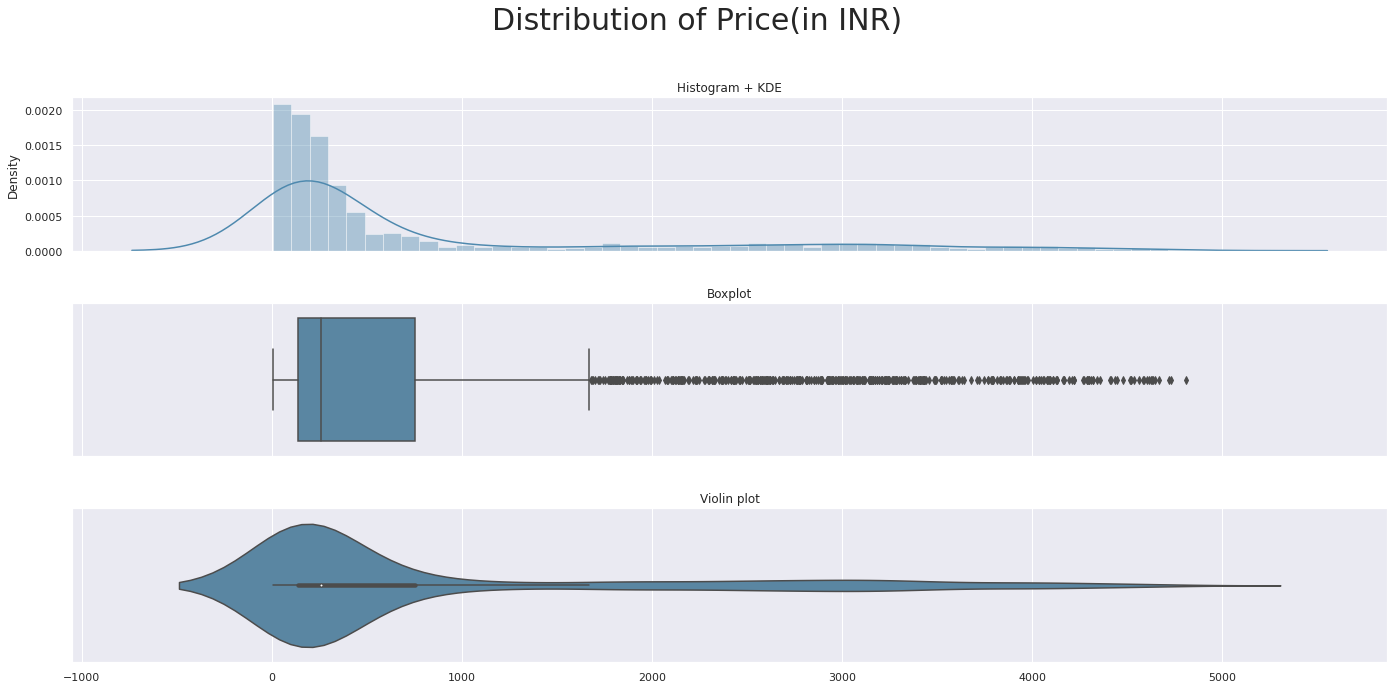

In [10]:
triple_plot(data['Price'],'Distribution of Price(in INR)',custom_colors[0])

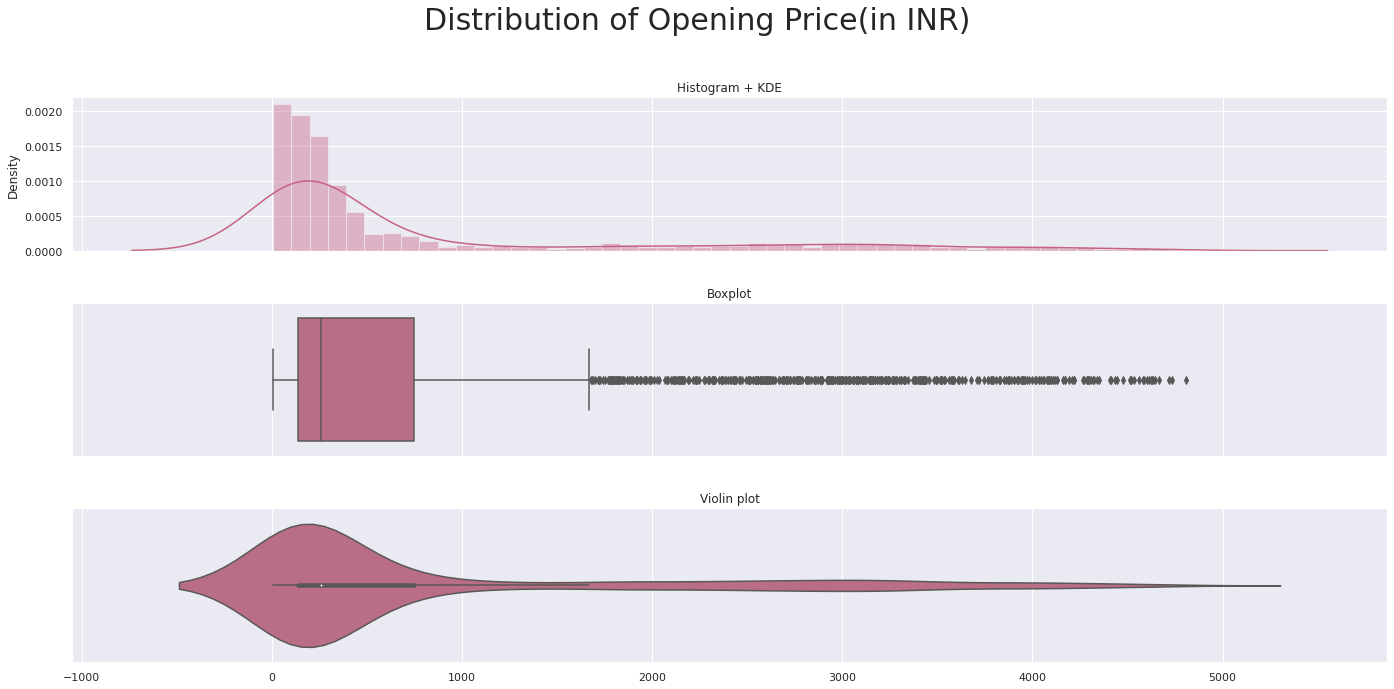

In [11]:
triple_plot(data['Open'],'Distribution of Opening Price(in INR)',custom_colors[1])

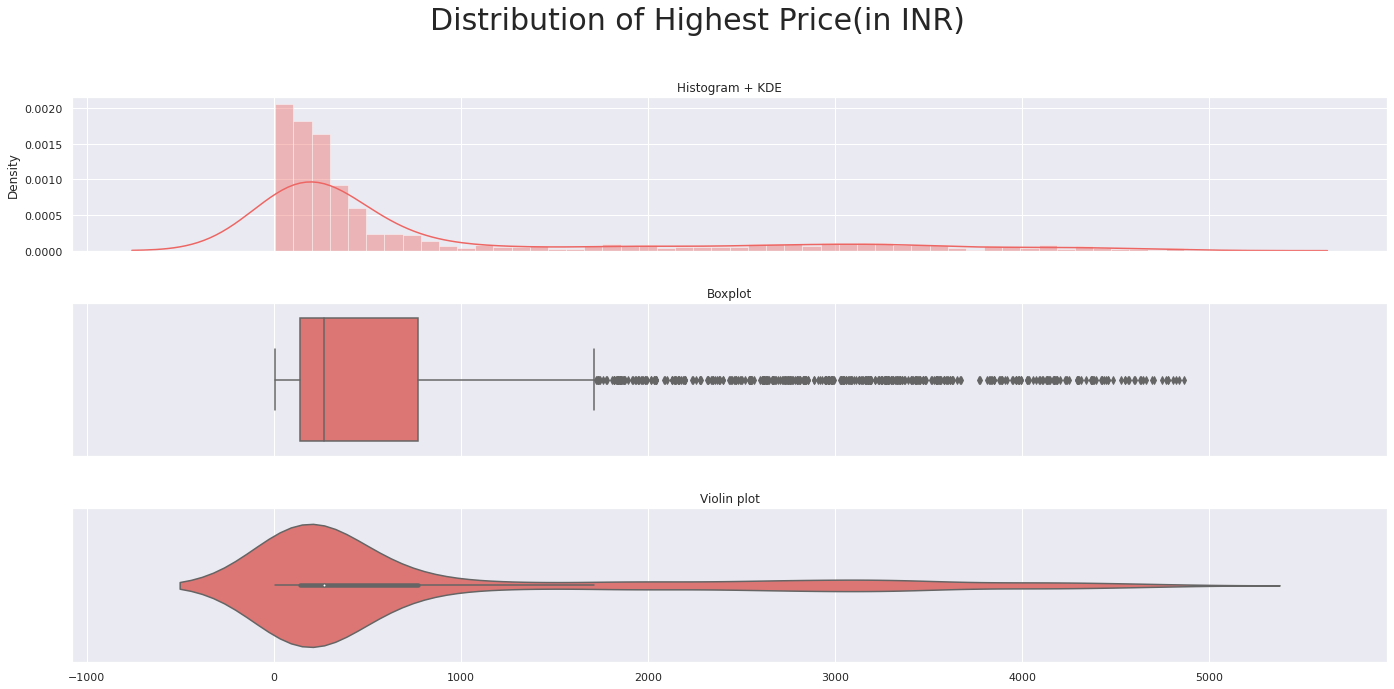

In [12]:
triple_plot(data['High'],'Distribution of Highest Price(in INR)',custom_colors[2])

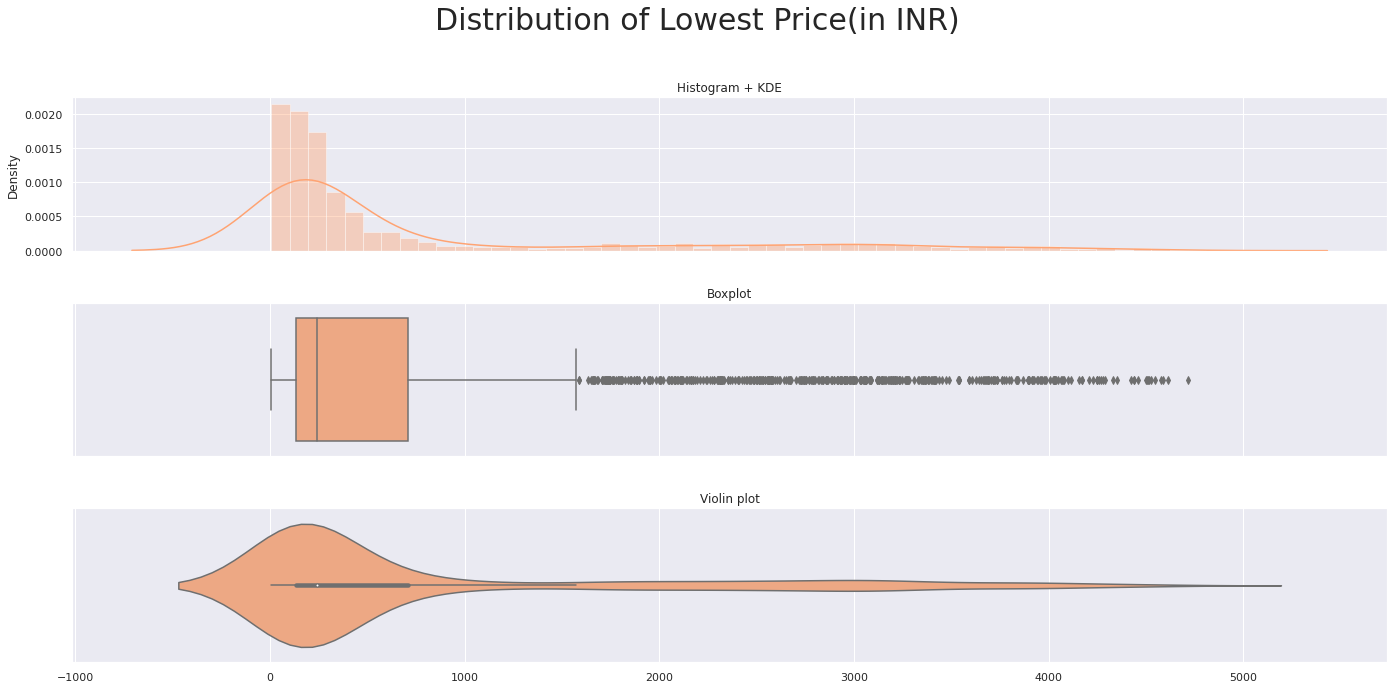

In [13]:
triple_plot(data['Low'],'Distribution of Lowest Price(in INR)',custom_colors[3])

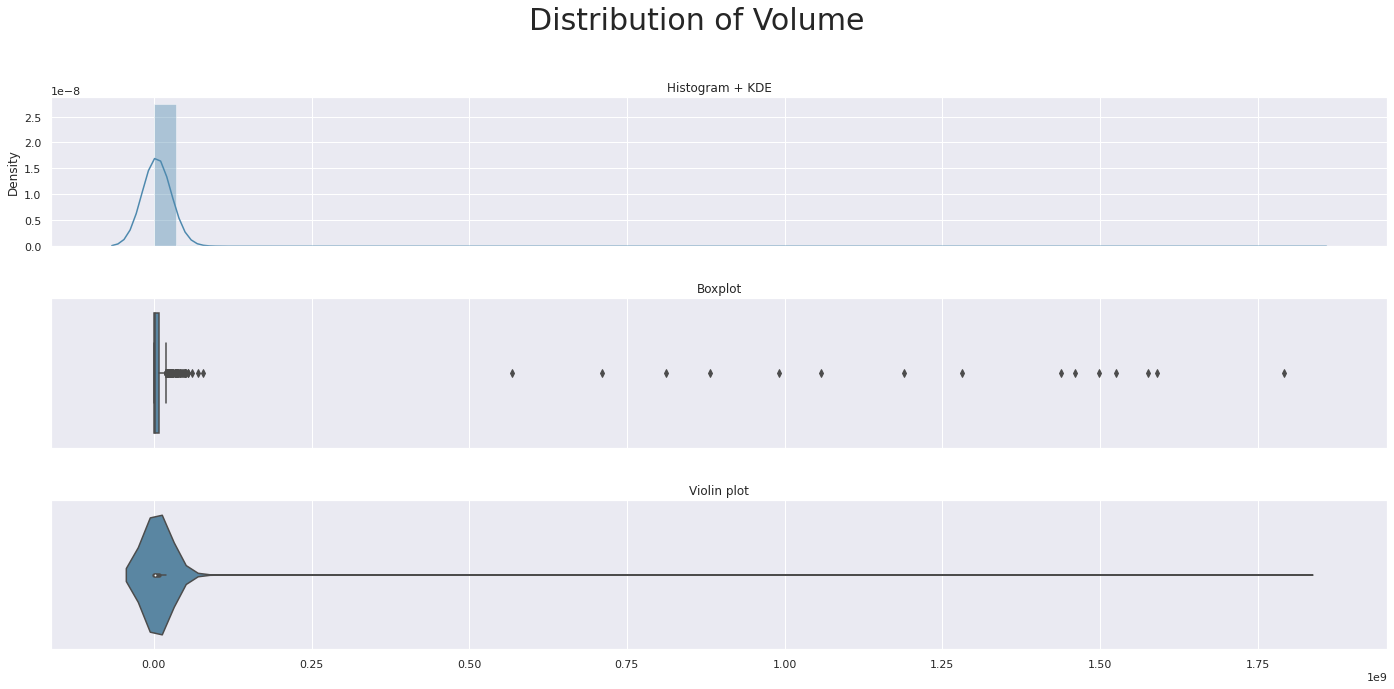

In [14]:
triple_plot(data['Volume'],'Distribution of Volume',custom_colors[0])

<a id="4"></a>
<h2 style='background-color:#98FB98; border:0; color:black'><center>Correlation Analysis</center><h2>

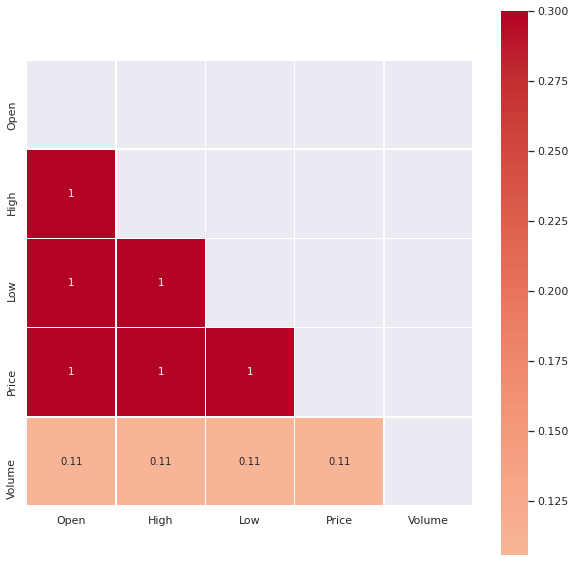

In [15]:
plt.figure(figsize=(10,10))
corr=data[data.columns[1:]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(data[data.columns[1:]].corr(), mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5,annot=True)
plt.show()

<div class="alert alert-info">
    <h3><b><center>Correlation Network</center><b></h3>
</div>


In [16]:
indices = corr.index.values
cor_matrix = np.asmatrix(corr)
G = nx.from_numpy_matrix(cor_matrix)
G = nx.relabel_nodes(G,lambda x: indices[x])
#G.edges(data=True)

In [17]:
def corr_network(G, corr_direction, min_correlation):
    H = G.copy()

    for s1, s2, weight in G.edges(data=True):       
        if corr_direction == "positive":
            if weight["weight"] < 0 or weight["weight"] < min_correlation:
                H.remove_edge(s1, s2)
        else:
            if weight["weight"] >= 0 or weight["weight"] > min_correlation:
                H.remove_edge(s1, s2)
                
    edges,weights = zip(*nx.get_edge_attributes(H,'weight').items())
    weights = tuple([(1+abs(x))**2 for x in weights])
   
    d = dict(nx.degree(H))
    nodelist=d.keys()
    node_sizes=d.values()
    
    positions=nx.circular_layout(H)
    
    plt.figure(figsize=(10,10))

    nx.draw_networkx_nodes(H,positions,node_color='#d100d1',nodelist=nodelist,
                       node_size=tuple([x**5 for x in node_sizes]),alpha=0.8)

    nx.draw_networkx_labels(H, positions, font_size=13)

    if corr_direction == "positive":
        edge_colour = plt.cm.summer 
    else:
        edge_colour = plt.cm.autumn
        
    nx.draw_networkx_edges(H, positions, edgelist=edges,style='solid',
                          width=weights, edge_color = weights, edge_cmap = edge_colour,
                          edge_vmin = min(weights), edge_vmax=max(weights))
    plt.axis('off')
    plt.show() 

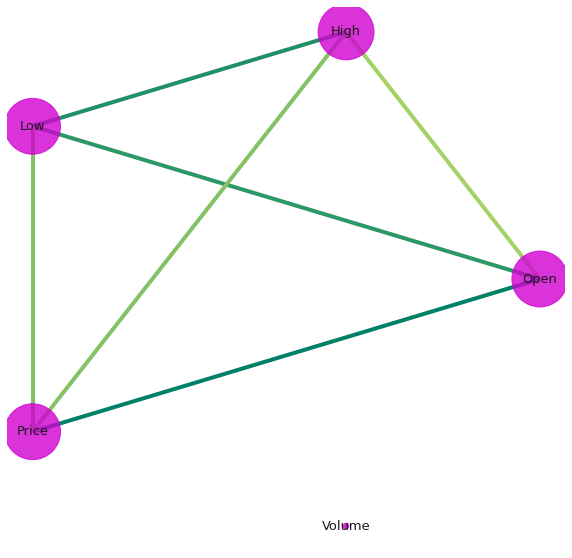

In [18]:
corr_network(G, corr_direction="positive",min_correlation = 0.5)


<a id="5"></a>
<h2 style='background-color:#98FB98; border:0; color:black'><center>Candle stick chart on the price movements of the Ethereum</center><h2>


![](https://www.tradingwithrayner.com/wp-content/uploads/2018/05/1-OHLC-COMBINE.png)

In [19]:
fig = go.Figure(data=[go.Candlestick(x=data['Date'],
                open=data['Open'], high=data['High'],
                low=data['Low'], close=data['Price'])
                      ])
fig.show()

In [20]:
data['month']=data['Date'].dt.month
fig = go.Figure(data=[go.Candlestick(x=data['month'],
                open=data['Open'], high=data['High'],
                low=data['Low'], close=data['Price'])
                      ])
fig.show()

<a id="6"></a>
<h2 style='background-color:#98FB98; border:0; color:black'><center>Time series Analysis and Prediction using Prophet</center><h2>



<img src="https://insightimi.files.wordpress.com/2020/07/on-de793_201909_g_20190830121038.gif" width='500' height='500'>

<div class="alert alert-warning">
    <h1><b><center>What is Prophet?</center><b></h1>
    <h3>Prophet is a facebooks’ open source time series prediction. Prophet decomposes time series into trend, seasonality and holiday. It has intuitive hyper parameters which are easy to tune.</h3>
</div>




<div class='alert alert-warning'>
    <h2><b><center>Advantages of using Prophet</center><b></h2>
        <h3> 1. Accommodates seasonality with multiple periods</h3>
        <h3> 2. Prophet is resilient to missing values</h3>
        <h3> 3. Best way to handle outliers in Prophet is to remove them</h3>
        <h3> 4. Fitting of the model is fast</h3>
    <h3> 5. Intuitive hyper parameters which are easy to tune</h3>
</div>

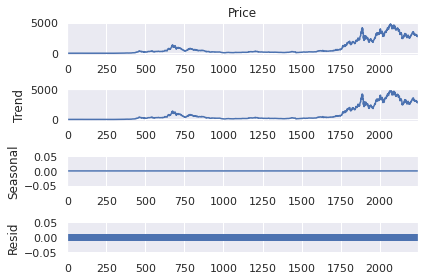

<Figure size 1080x864 with 0 Axes>

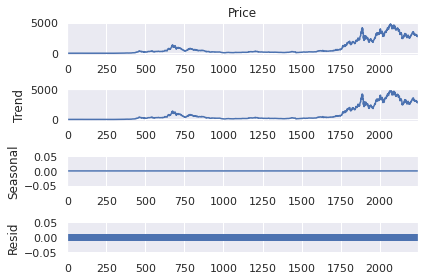

In [21]:
plt.figure(figsize=(15,12))
series = data.Price
result = seasonal_decompose(series, model='additive',period=1)
result.plot()

<div class='alert alert-warning'>
    <h3><center>Input to Prophet is a data frame with minimum two columns : ds and y</center></h3>
</div>

In [22]:
# Renaming the column names accroding to Prophet's requirements
prophet_df=data[['Date','Price']]
prophet_df.rename(columns={'Date':'ds','Price':'y'},inplace=True)


/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4446: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<div class='alert alert-warning'>
    <h2><center>Creating and fitting the Prophet model with default values</center></h2>
    <h3>We will first explore the default Prophet model. Create the Prophet instance with all default values, fit the dataset.</h3>
</div>

In [23]:
prophet_basic = Prophet()
prophet_basic.fit(prophet_df[['ds','y']])

<div class='alert alert-warning'>
    <h2><center>Predicting the values for the future</center></h2>
<h4>For predicting the values using Prophet, we need to create a dataframe with ds(datetime stamp) containing the dates for which we want to make the predictions.<br><br>
We use make_future_dataframe() to which we specify the number of days to extend into the future. By default it includes dates from the history</h4>
</div>

In [24]:
future= prophet_basic.make_future_dataframe(periods=300)
future.tail(2)

,ds
2542,2023-02-24
2543,2023-02-25


In [25]:
forecast=prophet_basic.predict(future)

<div class='alert alert-warning'>
    <h3><center>Plotting the predicted data</center></h3>
</div>

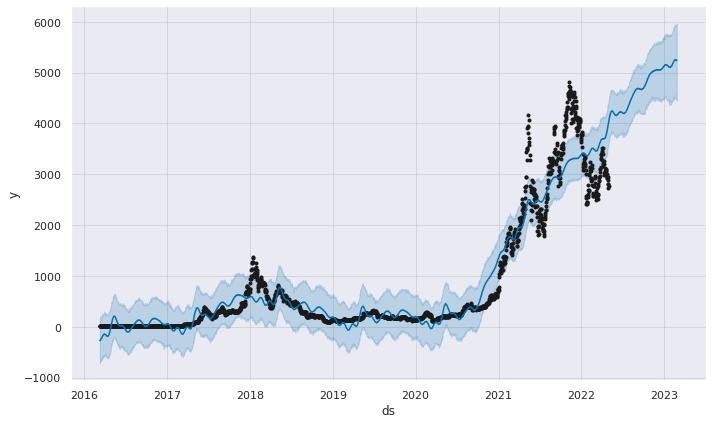

In [26]:
fig1 =prophet_basic.plot(forecast)

<div class='alert alert-warning'>
    <h3><center>Plotting the Forecasted components(Trend and Seasonality)</center></h3>
</div>

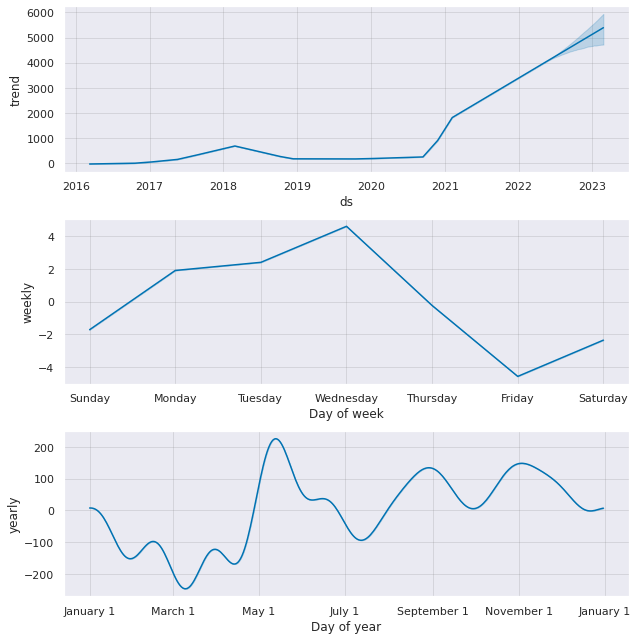

In [27]:
fig1 = prophet_basic.plot_components(forecast)

<div class='alert alert-warning'>
    <h3><center>Adding ChangePoints to Prophet</center></h3>
<h4>Changepoints are the datetime points where the time series have abrupt changes in the trajectory.<br>
By default, Prophet adds 25 changepoints to the initial 80% of the data-set.<br>
    <br><center>Let’s plot the vertical lines where the potential changepoints occurred</center><h4>
    </div>

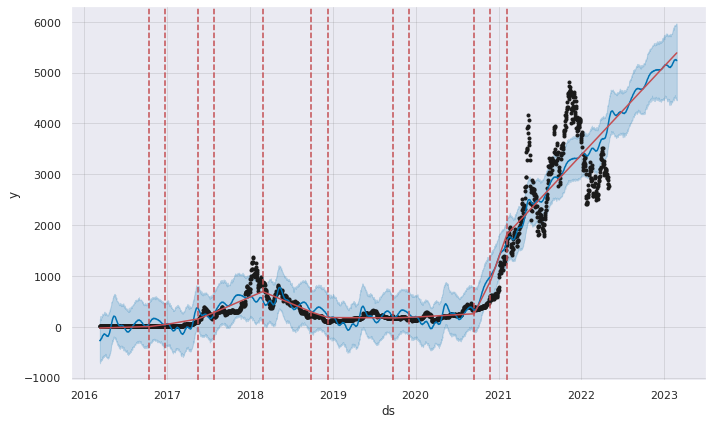

In [28]:
fig = prophet_basic.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet_basic, forecast)

<div class='alert alert-warning'>
        <h3> Following are the Changepoints, where the time series had abrupt changes in the trajectory.</h3>
</div>

In [29]:
print(f'{m_}Change points:\n {y_}{prophet_basic.changepoints}\n')

Change points:
 72     2016-05-21
144    2016-08-01
215    2016-10-11
287    2016-12-22
359    2017-03-04
431    2017-05-15
502    2017-07-25
574    2017-10-05
646    2017-12-16
718    2018-02-26
789    2018-05-08
861    2018-07-19
933    2018-09-29
1005   2018-12-10
1076   2019-02-19
1148   2019-05-02
1220   2019-07-13
1292   2019-09-23
1363   2019-12-03
1435   2020-02-13
1507   2020-04-25
1579   2020-07-06
1650   2020-09-15
1722   2020-11-26
1794   2021-02-06
Name: ds, dtype: datetime64[ns]



<div class='alert alert-warning'>
    <h2><center>Adding Multiple Regressors</center></h2>
<h3>Additional regressors can be added to the Prophet model. This is done by using add_regressor. Additional regressor column value needs to be present in both the fitting as well as prediction dataframes.<h3>
    <h3><center>Creating fitting and predicting dataset with additional regressors</center></h3>
    </div>

In [30]:
prophet_df['Open'] = data['Open']
prophet_df['High'] = data['High']
prophet_df['Low'] = data['Low']
prophet_df['Vol'] = data['Volume']
#prophet_df['Change'] = data['Change %']
prophet_df=prophet_df.dropna()
train_X= prophet_df[:1500]
test_X= prophet_df[1500:]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [31]:
pro_regressor= Prophet()
pro_regressor.add_regressor('Open')
pro_regressor.add_regressor('High')
pro_regressor.add_regressor('Low')
pro_regressor.add_regressor('Vol')
#pro_regressor.add_regressor('Change')


In [32]:
#Fitting the data
pro_regressor.fit(train_X)
future_data = pro_regressor.make_future_dataframe(periods=249)

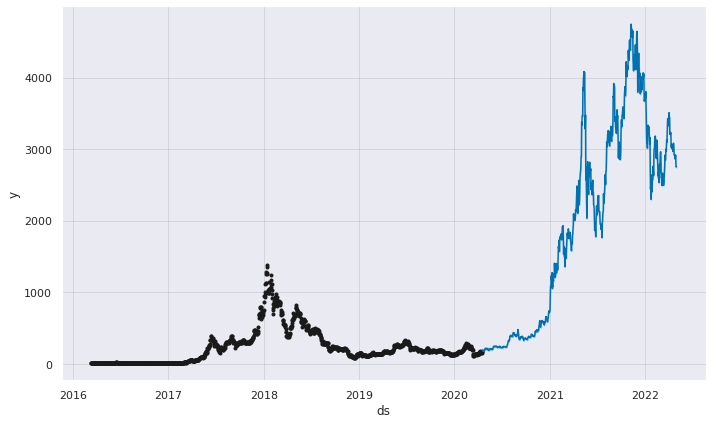

In [33]:
#Forecast the data for Test  data
forecast_data = pro_regressor.predict(test_X)
pro_regressor.plot(forecast_data);

<div class='alert alert-warning'>
<h3><center>6 different types of metrics are shown by each time horizon, but by taking moving average over 37 days in this case (can be changed by ‘rolling_window’ option).</center></h3>
</div>

  0%|          | 0/6 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,76.320132,8.736139,5.226026,0.023833,0.017209,0.646119
1,38 days,75.657413,8.698127,5.217184,0.024117,0.018293,0.643836
2,39 days,73.911163,8.597160,5.115077,0.023823,0.018293,0.648402
3,40 days,72.497029,8.514519,5.083767,0.023936,0.017209,0.643836
4,41 days,71.159915,8.435634,5.015459,0.023854,0.016890,0.639269


,horizon,mse,rmse,mae,mape,mdape,coverage
324,361 days,101.053710,10.052547,7.325831,0.031963,0.026370,0.554795
325,362 days,110.038881,10.489942,7.522711,0.032487,0.026139,0.554795
326,363 days,110.625187,10.517851,7.546871,0.032808,0.026370,0.554795
327,364 days,116.014772,10.771015,7.673974,0.033224,0.026457,0.552511
328,365 days,114.748548,10.712075,7.641303,0.032785,0.026370,0.552511


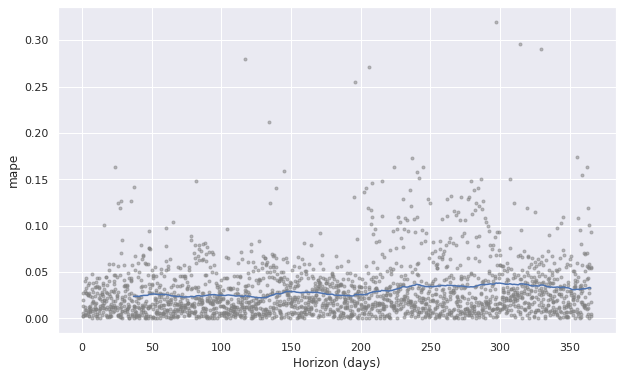

In [34]:
df_cv = cross_validation(pro_regressor, initial='100 days', period='180 days', horizon = '365 days')
pm = performance_metrics(df_cv, rolling_window=0.1)
display(pm.head(),pm.tail())
fig = plot_cross_validation_metric(df_cv, metric='mape', rolling_window=0.1)
plt.show()

<div class='alert alert-info'>
    <h3><center>MAPE</center></h3>
    <p>The MAPE (Mean Absolute Percent Error) measures the size of the error in percentage terms. It is calculated as the average of the unsigned percentage error</p>
    <p>Many organizations focus primarily on the MAPE when assessing forecast accuracy. Most people are comfortable thinking in percentage terms, making the MAPE easy to interpret. It can also convey information when you don’t know the item’s demand volume. For example, telling your manager, "we were off by less than 4%" is more meaningful than saying "we were off by 3,000 cases," if your manager doesn’t know an item’s typical demand volume.<p>
    <img src="https://www.forecastpro.com/Trends/images/MAPE1.jpg" width='500'>
</div>

<div class='alert alert-warning'>
    <h3><center>What Prophet doesnt do</center></h3>
    <h4><b>1.Prophet does not allow non-Gaussian noise distribution:<b></h4> 
<p>In Prophet, noise distribution is always Gaussian and pre-transformation of y values is the only way to handle the values following skewed distribution.</p>
        <h4><b>2. Prophet does not take autocorrelation on residual into account</b></h4>
<p>Since epsilon noise portion in the formula assume i.i.d. normal distribution, the residual is not assumed to have autocorrelation, unlike ARIMA model.</p>
        <h4><b>3. Prophet does not assume stochastic trend</b></h4>
<p>Prophet’s trend component is always deterministic+possible changepoints and it won’t assume stochastic trend unlike ARIMA.</p>
</div>

<a id="7"></a>
## References 

1. [Time series prediction using Prophet in Python by Renu Khandelwal](https://towardsdatascience.com/time-series-prediction-using-prophet-in-python-35d65f626236)
2. [Facebook Prophet by Moto DEI](https://medium.com/swlh/facebook-prophet-426421f7e331)
3. [Housing pices EDA and Prediction by Ruchi Bhatia](https://www.kaggle.com/ruchi798/housing-prices-eda-and-prediction)
4. [88.9 r2_score with pycaret by Kerem Yucedag](https://www.kaggle.com/keremyceda/88-9-r2-score-with-pycaret)

<div class ='alert alert-info'>
    <h2><center>Dataset</center><h2>


    
<a href="https://www.kaggle.com/kaushiksuresh147/ethereum-cryptocurrency-historical-dataset"><h3><center>Click here to explore the Dataset</center></h3></a>

<h3> The Dataset will be updated on a weekly basis. Stay tuned for more insights and different approaches.</h3></div>